# Basic ANN using the tensorflow

## importing the lobraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

mnist = keras.datasets.mnist

(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


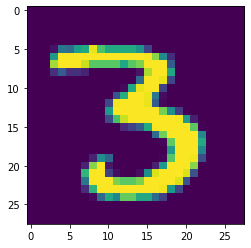

In [3]:
plt.imshow(x_train_full[12])

## Normalizing the images

In [4]:
x_train_normalized = x_train_full/255
x_test_normalized = x_test/255

x_valid, x_train = x_train_normalized[:5000], x_train_normalized[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test_normalized

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

## creating model

In [6]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 400)               120400    
                                                                 
 dense_2 (Dense)             (None, 100)               40100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 397,010
Trainable params: 397,010
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Fitting the model

In [9]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6234 - accuracy: 0.8373 - val_loss: 0.2896 - val_accuracy: 0.9184
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2687 - accuracy: 0.9221 - val_loss: 0.2187 - val_accuracy: 0.9392
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2100 - accuracy: 0.9382 - val_loss: 0.1757 - val_accuracy: 0.9506
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1712 - accuracy: 0.9502 - val_loss: 0.1502 - val_accuracy: 0.9588
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1446 - accuracy: 0.9580 - val_loss: 0.1351 - val_accuracy: 0.9606
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1246 - accuracy: 0.9639 - val_loss: 0.1191 - val_accuracy: 0.9674
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1084 - accuracy: 0.9688 - val_loss: 0.1109 - val_accuracy:

### Prediction

In [10]:
x_sample = x_test[:5]
y_probability = model.predict(x_sample)

1/1 [==============================] - 0s 68ms/step


In [11]:
print(y_probability)

[[1.2861960e-08 8.3762131e-08 4.1368352e-07 2.1597988e-04 1.9399813e-09
  2.5536604e-08 2.3315055e-13 9.9978012e-01 5.5084763e-07 2.7619844e-06]
 [2.9821922e-06 9.7838616e-05 9.9988735e-01 7.6596962e-06 1.7418808e-12
  3.8768002e-09 6.9051754e-07 1.6849569e-11 3.4151960e-06 4.1155102e-14]
 [3.7254566e-07 9.9854940e-01 1.6285207e-05 1.9624356e-06 4.9648581e-05
  1.4957484e-06 2.1730937e-05 1.2122388e-03 1.4601703e-04 7.1596440e-07]
 [9.9997258e-01 1.0794888e-08 2.4102692e-05 1.1689054e-08 1.5874738e-08
  7.7561735e-09 3.6145761e-07 2.7584672e-06 7.2446285e-11 2.5630328e-07]
 [1.5043062e-07 9.4373078e-09 1.5319409e-07 9.3469753e-11 9.9956959e-01
  4.1508335e-09 1.2480380e-07 2.1346571e-04 1.9215742e-07 2.1629446e-04]]


In [12]:
y_predict = model.predict(x_sample)

1/1 [==============================] - 0s 15ms/step


In [13]:
print(y_predict)

[[1.2861960e-08 8.3762131e-08 4.1368352e-07 2.1597988e-04 1.9399813e-09
  2.5536604e-08 2.3315055e-13 9.9978012e-01 5.5084763e-07 2.7619844e-06]
 [2.9821922e-06 9.7838616e-05 9.9988735e-01 7.6596962e-06 1.7418808e-12
  3.8768002e-09 6.9051754e-07 1.6849569e-11 3.4151960e-06 4.1155102e-14]
 [3.7254566e-07 9.9854940e-01 1.6285207e-05 1.9624356e-06 4.9648581e-05
  1.4957484e-06 2.1730937e-05 1.2122388e-03 1.4601703e-04 7.1596440e-07]
 [9.9997258e-01 1.0794888e-08 2.4102692e-05 1.1689054e-08 1.5874738e-08
  7.7561735e-09 3.6145761e-07 2.7584672e-06 7.2446285e-11 2.5630328e-07]
 [1.5043062e-07 9.4373078e-09 1.5319409e-07 9.3469753e-11 9.9956959e-01
  4.1508335e-09 1.2480380e-07 2.1346571e-04 1.9215742e-07 2.1629446e-04]]
